In [37]:
#=============================================================================#
#                            Importing packages                               #
#=============================================================================#
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

In [38]:
#=============================================================================#
#                                PARAMETERS                                   #
#=============================================================================#
key = QuantumRegister(2, name='q_input')
data = QuantumRegister(3, name='ancilla')
results = ClassicalRegister(5)
circuit = QuantumCircuit(data, key, results)
# Diccionary
table = {
    "00":"111",
    "01":"010",
    "10":"011",
    "11":"101"
}

In [39]:
#=============================================================================#
#                           Function: qram_single                             #
#=============================================================================#
def qram_single(key, data, results, table, input_key):
    """
    qram_single:
    --------------------------------------------------------------------------
    param key: (Quantum Register) Targets qubits
    param data: (Quantum Register) ancilla qubits
    param results: (Classical Register) where measurements are stored
    param table: (dicc) keeping the relation between targets qubits (key) and
                ancilla qubits (data)
    param input_key: (str) Initial state of target qubits (key)
    output: (Quantum circuit) Create a circuit with the minimum gates to 
            satisty the problem for a specific input_key.
    """
    
    # Create the quantum circuit
    quantum_circuit = QuantumCircuit(data, key, results)
    
    # Quantum inputs
    qr = [int(input_key[0]), int(input_key[1])]
    print('The quantum inputs are:', qr[0], 'and', qr[1])
    
    # Ancilla qubits
    qa = [int(table[input_key][0]), int(table[input_key][1]), 
          int(table[input_key][2])]
    print('The ancilla qubits are:', qa)

    # Initialize the quantum register 
    # and activate Qubit so that it control the ancilla 
    if qr[0]==1:
        quantum_circuit.x(key[0])
    else:
        quantum_circuit.x(key[0])
    if qr[1]==1:
        quantum_circuit.x(key[1])
    else:
        quantum_circuit.x(key[1])

    # Quantum circuit
    for count, ancilla in enumerate(qa):
        if ancilla==1:
            quantum_circuit.ccx(key[0], key[1], data[count])
            print(key[0], key[1],count)
    
    # Undo the activation on the 
    if qr[0]==0:
        quantum_circuit.x(key[0])
    if qr[1]==0:
        quantum_circuit.x(key[1]) 
        
    quantum_circuit.barrier()
    
    # Measure
    quantum_circuit.measure(key[0:2], results[0:2])
    quantum_circuit.measure(data[0:3], results[2:5])

    quantum_circuit = quantum_circuit.reverse_bits()
  
    return quantum_circuit

The quantum inputs are: 0 and 1
The ancilla qubits are: [0, 1, 0]
Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 1


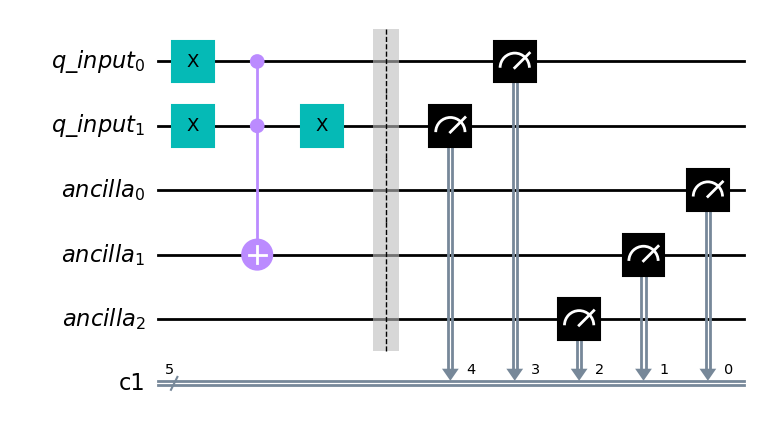

In [40]:
#=============================================================================#
#                                Draw                                         #
#=============================================================================#
circ = qram_single(key, data, results, table, '01')
circ.draw(output='mpl')

In [41]:
#=============================================================================#
#                                Results                                      #
#=============================================================================#
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1024, backend_options={"fusion_enable":True})
result = job.result()
counts = result.get_counts()

In [42]:
print(list(counts.keys())[0][2:5],'->',list(counts.values())[0])

010 -> 1024


In [43]:
#=============================================================================#
#                           Function: qram_table                              #
#=============================================================================#
def qram_table(key, data, results, table, input_key):
    """
    qram_table:
    --------------------------------------------------------------------------
    param key: (Quantum Register) Targets qubits
    param data: (Quantum Register) ancilla qubits
    param results: (Classical Register) where measurements are stored
    param table: (dicc) keeping the relation between targets qubits (key) and
                ancilla qubits (data)
    param input_key: (str) Initial state of target qubits (key)
    output: (Quantum circuit) Create a circuit with the minimum gates that 
            statisfy the problem for all the keys in table.
    """
    
    # Create the quantum circuit
    quantum_circuit = QuantumCircuit(data, key, results)

    # Initialize the Quantum Circuit
    if int(input_key[0])==1:
        quantum_circuit.x(key[0])
    if int(input_key[1])==1:
        quantum_circuit.x(key[1])
        
    quantum_circuit.barrier()
    
    for qr_str, qa_str in table.items():
        qr = [int(qr_str[0]), int(qr_str[1])]
        qa = [int(qa_str[0]), int(qa_str[1]), int(qa_str[2])]

        # Activate qubits
        if qr[0]==0:
            quantum_circuit.x(key[0])
        if qr[1]==0:
            quantum_circuit.x(key[1])

        # Quantum circuit
        for count, ancilla in enumerate(qa):
            if ancilla==1:
                quantum_circuit.ccx(key[0], key[1], data[count])
                print(key[0], key[1],count)
        
        # Undo the activation on the 
        if qr[0]==0:
            quantum_circuit.x(key[0])
        if qr[1]==0:
            quantum_circuit.x(key[1]) 

        quantum_circuit.barrier()

    # Measure
    quantum_circuit.measure(key[0:2], results[0:2])
    quantum_circuit.measure(data[0:3], results[2:5])

    quantum_circuit = quantum_circuit.reverse_bits()
  
    return quantum_circuit

Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 0
Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 1
Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 2
Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 1
Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 1
Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 2
Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 0
Qubit(QuantumRegister(2, 'q_input'), 0) Qubit(QuantumRegister(2, 'q_input'), 1) 2


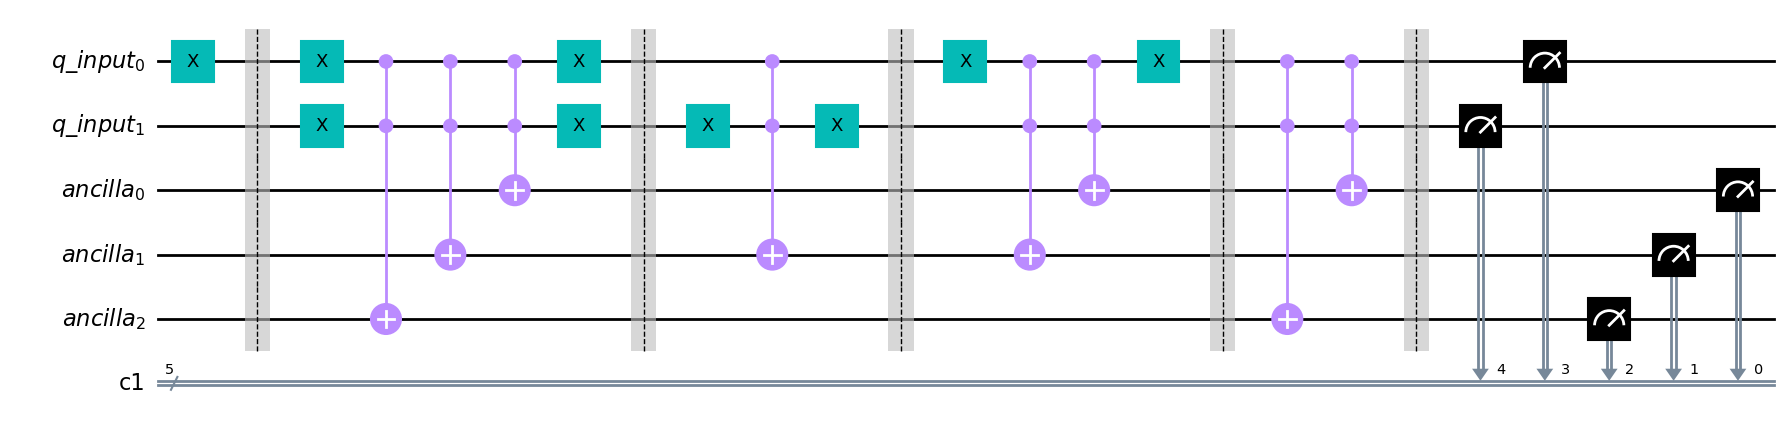

In [44]:
#=============================================================================#
#                                Draw                                         #
#=============================================================================#
circ = qram_table(key, data, results, table, '01')
circ.draw(output='mpl')

In [45]:
#=============================================================================#
#                                Results                                      #
#=============================================================================#
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend=backend, shots=1024, backend_options={"fusion_enable":True})
result = job.result()
counts = result.get_counts()

In [46]:
print(list(counts.keys())[0][2:5],'->',list(counts.values())[0])

010 -> 1024
